### Do your imports!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/Users/susanmerriam/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# 311 data analysis

## Read in `subset.csv` and review the first few rows

Even though it's a giant file – gigs and gigs! – it's a subset of the [entire dataset](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). It covers plenty of years, but not all of the columns.

If your computer is struggling (which it will!) or you are impatient, feel free to use `nrows=` when reading it in to speed up the process by only reading in a subset of columns. Pull in at least a few million, or a couple years back.

In [2]:
df = pd.read_csv("/Users/susanmerriam/Documents/DATABASES/data-hwork/github_folders/hwork-docs/07-homework/311/subset.csv", nrows = 2000000, encoding="utf-8")

/Users/susanmerriam/.pyenv/versions/3.10.0/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head(3)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE


In [4]:
# subset = df.sample
# df.df.head(10000).copy()

In [5]:
df.agency_name = df.agency_name.str.lower().replace(" ", "_", regex=False)
df.complaint_type = df.complaint_type.str.lower().replace(" ", "_", regex=False)
df.complaint_type = df.complaint_type.str.lower().replace("-", "_", regex=False)
df.descriptor = df.descriptor.str.lower().replace(" ", "_", regex=False)
df.descriptor = df.descriptor.str.lower().replace("/", "_", regex=False)
df.location_type = df.location_type.str.lower().replace(" ", "_", regex=False)
df.address_type = df.address_type.str.lower().replace(" ", "_", regex=False)
df.city = df.city.str.lower().replace(" ", "_", regex=False)
df.status = df.status.str.lower().replace(" ", "_", regex=False)
df.open_data_channel_type = df.open_data_channel_type.str.lower().replace(" ", "_", regex=False)
df.borough = df.borough.str.lower().replace(" ", "_", regex=False)

In [6]:
# df.columns 
# df.columns = df.columns.str.lower()
# df.columns = df.columns.str.lower().str.replace(" ", "_")

In [7]:
df = df.rename(columns={'open_data_channel_type': 'channel'})
df = df.rename(columns={'incident_zip': 'zip'})

In [8]:
df.head(3)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,zip,incident_address,address_type,city,status,borough,channel
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,department of housing preservation and develop...,general,bell/buzzer/intercom,residential building,11216,30 MAC DONOUGH STREET,address,brooklyn,closed,brooklyn,phone
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,department of housing preservation and develop...,paint/plaster,ceiling,residential building,10453,30 RICHMAN PLAZA,address,bronx,closed,bronx,phone
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,external affairs unit,dof property - payment issue,bill received in error,property address,11412,120-25 200 STREET,address,saint albans,closed,queens,phone


In [9]:
df.shape

(2000000, 15)

In [10]:
df.dtypes

unique_key           int64
created_date        object
closed_date         object
agency              object
agency_name         object
complaint_type      object
descriptor          object
location_type       object
zip                 object
incident_address    object
address_type        object
city                object
status              object
borough             object
channel             object
dtype: object

In [11]:
# df = df.dropna(subset=['Beer'])
# df = df.dropna(subset=['full_flowering_date'])

In [12]:
# parse dates=date)colns 

### Where the subset came from

If you're curious, I took the [original data](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data) and clipped out a subset by using the command-line tool [csvkit](https://csvkit.readthedocs.io/en/latest/).

First I inspected the column headers:

```bash
$ csvcut -n 311_Service_Requests_from_2010_to_Present.csv 
```

Then I selected the columns I was interested in and saved it to a file.

```bash
$ csvcut -c 1,2,3,4,5,6,7,8,9,10,16,17,20,26,29 311_Service_Requests_from_2010_to_Present.csv > subset.csv
```

This was much much much much faster than doing it in Python.

## We want more columns!

**Right now we don't see all of the columns.** For example, mine has `...` between the **Incident Address** column and the **City** column. Go up to the top where you imported pandas, and add a `pd.set_option` line that will allow you to view all of the columns of the dataset.

In [13]:
# just show all the columns
# pd.set_option("display.max_columns", None)

# just show 3 columns
# pd.set_option("display.max_columns", 3)

# max rows = problematic to show all rows
# pd.set_option("display.max_rows", 3)

In [14]:
pd.set_option("display.max_colwidth", None)
df.head(3)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,zip,incident_address,address_type,city,status,borough,channel
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,department of housing preservation and development,general,bell/buzzer/intercom,residential building,11216,30 MAC DONOUGH STREET,address,brooklyn,closed,brooklyn,phone
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,department of housing preservation and development,paint/plaster,ceiling,residential building,10453,30 RICHMAN PLAZA,address,bronx,closed,bronx,phone
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,external affairs unit,dof property - payment issue,bill received in error,property address,11412,120-25 200 STREET,address,saint albans,closed,queens,phone


## We hate those column names!

Change the column names to be tab- and period-friendly, like `df.created_date` instead of `df['Created Date']`

# Dates and times

## Are the datetimes actually datetimes?

We're going to be doing some datetime-y things, so let's see if the columns that look like dates are actually dates.

In [15]:
df.dtypes

unique_key           int64
created_date        object
closed_date         object
agency              object
agency_name         object
complaint_type      object
descriptor          object
location_type       object
zip                 object
incident_address    object
address_type        object
city                object
status              object
borough             object
channel             object
dtype: object

## In they aren't datetimes, convert them

The ones we're interested in are as follows:

* Created Date
* Closed Date

You have two options to convert them:

1. Do it like we did in class, but **overwrite the existing string columns with the new datetime versions**
2. Find an option with `read_csv` to automatically read certain columns as dates! Use the shift+tab trick to read the `read_csv` docs to uncover it. Once you find it, you'll set it to be the **list of date-y columns**.

They're both going to take forever if you do them wrong, but can be faster with a few tricks. For example, using `pd.to_datetime` can be sped up significantly be specifying the format of the datestring.

For example, if your datetime was formatted as `YYYY-MM-DD HH:MM:SS AM`, you could use the following:

```
df.my_datetime = pd.to_datetime(df.my_datetime, format="%Y-%m-%d %I:%M:%S %p")
```

It's unfortunately much much much faster than the `read_csv` technique. And yes, [that's `%I` and not `%H`](https://strftime.org/).

> *Tip: What should happen if it encounters an error or missing data?*

In [16]:
df.created_date = pd.to_datetime(df.created_date, format="%m/%d/%Y %I:%M:%S %p")
# .dt.strftime("%m%d")
# df.head(3)

In [17]:
df.closed_date = pd.to_datetime(df.closed_date, format="%m/%d/%Y %I:%M:%S %p")
# .dt.strftime("%m%d")
df.dtypes

unique_key                   int64
created_date        datetime64[ns]
closed_date         datetime64[ns]
agency                      object
agency_name                 object
complaint_type              object
descriptor                  object
location_type               object
zip                         object
incident_address            object
address_type                object
city                        object
status                      object
borough                     object
channel                     object
dtype: object

In [18]:
df.head(50)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,zip,incident_address,address_type,city,status,borough,channel
0,41694420,2019-01-27 19:26:21,2019-02-13 10:53:25,HPD,department of housing preservation and development,general,bell/buzzer/intercom,residential building,11216,30 MAC DONOUGH STREET,address,brooklyn,closed,brooklyn,phone
1,41694421,2019-01-29 11:06:56,2019-02-13 02:07:22,HPD,department of housing preservation and development,paint/plaster,ceiling,residential building,10453,30 RICHMAN PLAZA,address,bronx,closed,bronx,phone
2,41694422,2019-02-13 12:28:18,2019-03-15 09:54:50,DOF,external affairs unit,dof property - payment issue,bill received in error,property address,11412,120-25 200 STREET,address,saint albans,closed,queens,phone
3,41694423,2019-02-13 15:40:19,2019-02-20 06:18:35,DOT,department of transportation,broken parking meter,out of order,street,11377,NaN,intersection,woodside,closed,queens,phone
4,41694424,2019-02-13 13:18:31,2019-02-20 05:36:54,DOT,department of transportation,broken parking meter,out of order,street,10461,1082 MORRIS PARK AVENUE,address,bronx,closed,bronx,phone
5,41694425,2019-02-13 00:44:06,2019-02-13 21:16:20,HPD,department of housing preservation and development,unsanitary condition,mold,residential building,11219,1238 50 STREET,address,brooklyn,closed,brooklyn,phone
6,41694426,2019-01-31 20:31:53,2019-02-13 14:48:55,HPD,department of housing preservation and development,unsanitary condition,mold,residential building,10040,9 SHERMAN AVENUE,address,new york,closed,manhattan,phone
7,41694430,2019-02-13 10:31:12,2019-02-21 14:16:41,DOT,department of transportation,sidewalk condition,sidewalk violation,sidewalk,11420,109-40 128 STREET,address,south ozone park,closed,queens,phone
8,41694431,2019-01-27 21:24:14,2019-02-13 13:45:47,HPD,department of housing preservation and development,unsanitary condition,mold,residential building,11225,827 NOSTRAND AVENUE,address,brooklyn,closed,brooklyn,phone
9,41694432,2019-02-13 12:37:00,2019-02-14 12:00:00,DEP,department of environmental protection,noise,noise: jack hammering (nc2),NaN,10018,17 WEST 38 STREET,address,new york,closed,manhattan,phone


In [19]:
df = df.dropna(subset=['created_date'])
df = df.dropna(subset=['closed_date'])
# df = df.dropna(subset=['full_flowering_date'])
df.shape

(1991095, 15)

## According to the dataset, which month of the year has the most 311 calls?

The kind of answer we're looking for is "January," not "January 2021"

In [20]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [21]:
# using dt aggregates the data by month of the year as opposed to the specific month of a specific year

In [22]:
df.created_date.dt.month.value_counts().sort_index(ascending = True)

1     184849
2     219386
3     309994
4     271350
5     283268
6     201453
7      85219
8     126286
9      82118
10     67295
11     83593
12     76284
Name: created_date, dtype: int64

<AxesSubplot:>

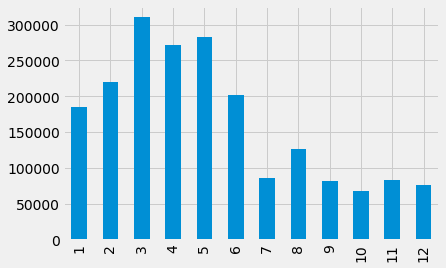

In [23]:
df.created_date.dt.month.value_counts().sort_index().plot(kind = 'bar')

In [24]:
# WRONG!! df.created_date.resample('M', on='created_date').size()
# every time you do resample, do the entire dataframe

In [25]:
# REF homicides_df = df[df.created_date == 'HOMICIDE'].copy()

## According to the dataset, which month has had the most 311 calls?

The kind of answer we're looking for is "January 2021," not "January" (although _techniucally_ it will say `2021-01-31`, not `January 2021`)

In [26]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [27]:
# using resample not only considers the month of the year but also the year itself in which it measures which month in a particular year had the most calls

In [28]:
df.resample('M', on='created_date').size().sort_values(ascending= False)

created_date
2019-05-31    212765
2019-03-31    198029
2019-04-30    189726
2019-06-30    130954
2010-01-31    110126
               ...  
2020-09-30        50
2020-12-31        41
2020-11-30        10
2020-10-31         9
2021-01-31         1
Length: 133, dtype: int64

<AxesSubplot:xlabel='created_date'>

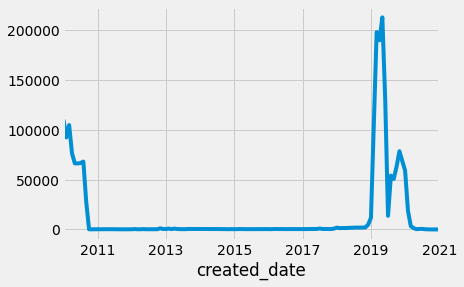

In [29]:
df.resample('M', on='created_date').size().plot()

## Plot the 311 call frequency over our dataset on a _weekly_ basis

To make your y axis start at zero, use `ylim=(0,100000)` when doing `.plot`. But replace the `1000` with a large enough value to actually see your data nicely!

In [30]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

/var/folders/8t/1rrw8b2x05595s5gystxsg3m0000gn/T/ipykernel_79981/2172311041.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df.created_date.dt.week.value_counts().sort_index().plot(kind = 'bar', ylim=(0,200000), xlabel='week', ylabel='# of calls')


<AxesSubplot:xlabel='week', ylabel='# of calls'>

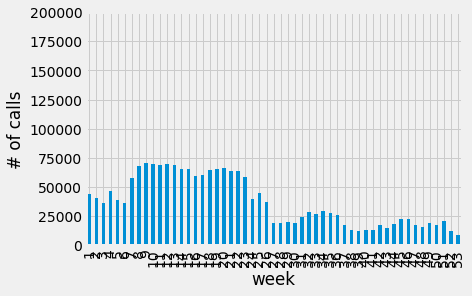

In [31]:
df.created_date.dt.week.value_counts().sort_index().plot(kind = 'bar', ylim=(0,200000), xlabel='week', ylabel='# of calls')

## What time of day (by hour) is the least common for 311 complains? The most common?


In [32]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [33]:
df.created_date.dt.hour.value_counts()
# .sort_index(ascending = True)

0     461568
10    125188
11    121007
9     117959
14    110750
12    110312
13    103527
15     96572
8      85772
16     84063
17     70003
18     66312
19     63372
21     59247
20     58675
22     56601
7      51141
23     46845
6      26683
1      23466
2      15034
5      13982
3      11867
4      11149
Name: created_date, dtype: int64

### Make a graph of the results

* Make sure the hours are in the correct order
* Be sure to set the y-axis to start at 0
* Give your plot a descriptive title

<AxesSubplot:xlabel='hour in the day (24-hr clock)', ylabel='# of calls'>

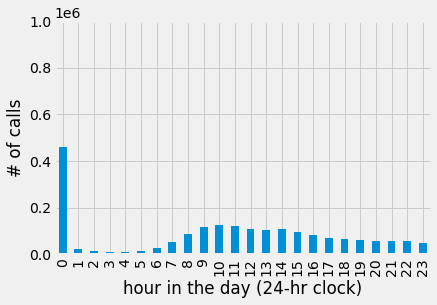

In [34]:
df.created_date.dt.hour.value_counts().sort_index().plot(kind = 'bar', ylim=(0,1000000), xlabel='hour in the day (24-hr clock)', ylabel='# of calls')

In [35]:
# df.resample('H', on='created_date').size().plot()

# Agencies

## What agencies field the most complaints in the dataset? Get the top 5.

Use the `agency` column for this one.

In [36]:
df.agency.value_counts().head(5)

HPD     813710
DOT     283114
DSNY    268788
NYPD    261794
DOB     209122
Name: agency, dtype: int64

## What are each of those agencies?

Define the following five acronyms:

* NYPD
* HPD
* DOT
* DSNY
* DEP

In [37]:
# NYPD = new york city police department
# HPD = department of housing preservation and development
# DOT = department of transportation 
# DSNY = department of sanitation
# DEP = department of environmental protection

In [38]:
df.agency_name.value_counts().head(10)

department of housing preservation and development    813703
department of transportation                          283114
new york city police department                       261344
department of buildings                               209122
department of environmental protection                117430
department of sanitation                              101764
bcc - brooklyn south                                   19688
a - brooklyn                                           15678
bcc - staten island                                    14839
bcc - brooklyn north                                   14494
Name: agency_name, dtype: int64

## What is the most common complaint to HPD?

In [39]:
HPD_df = df[df.agency == 'HPD'].copy()

In [40]:
HPD_df.complaint_type.value_counts().head(1)

heat/hot water    181316
Name: complaint_type, dtype: int64

In [41]:
# HPD_df.descriptor.value_counts().head(10)

In [42]:
# Why did you pick these columns to calculate the answer?

In [43]:
# I chose complaint type as opposed to descriptor for the
# Department of Housing Preservation and Development because
# it's a larger category that could be applied to multiple locations. 
# If I had used descriptor, the same type of complaint could be 
# refering to different locations and would be more difficult 
# to see what the complaints are for. For example, entire building 
# could refer to any type of complaint.

In [44]:
# REF CODE df[df.manner_of_death == 'HOMICIDE'].copy()

In [45]:
# complaint_type

## What are the top 3 complaints to each agency?

You'll want to use the weird confusing `.groupby(level=...` thing we learned when reviewing the homework.

In [46]:
# look at dogs hwork, top 5 dogs name ber borough
# group by level = 0 just something to cut and paste
# top n something per group, it's always level = 0, n (or head)
# just the way it is

# This is just one of those things you cut-and-paste or memorize
# REF CODE merged.groupby('neighborhood')['Primary Breed'].value_counts().groupby(level=0).nlargest(1)

In [47]:
# df.groupby('agency')['complaint_type'].value_counts() \
#     .groupby(level=0, group_keys=False).nlargest(3)

In [48]:
df.groupby('agency')['complaint_type'].value_counts().groupby(level=0, group_keys=False).nlargest(3)
# df.groupby('agency')['complaint_type'].value_counts().groupby(level=0, group_keys=False).nlargest(3)

agency  complaint_type                     
DCA     consumer complaint                       4240
DEP     noise                                   41497
        water system                            36160
        sewer                                   20844
DFTA    housing - low income senior              1589
        housing options                           507
        senior center complaint                    64
DHS     homeless person assistance                482
DOB     general construction/plumbing           80000
        elevator                                34933
        building/use                            34693
DOE     school maintenance                        354
DOF     dof property - payment issue             1582
        drie                                      500
        advocate-prop refunds/credits             116
DOHMH   rodent                                   5232
        indoor air quality                       1254
        food establishment            

## What is the most common kind of residential noise complaint?

The NYPD seems to deal with a lot of noise complaints at homes. What is the most common subtype?

In [49]:
noise_residential_df = df[df.complaint_type == 'noise - residential'].copy()
# noise_residential_df.head(5)

In [50]:
noise_residential_df.descriptor.value_counts().head(1)

loud music/party    47675
Name: descriptor, dtype: int64

<AxesSubplot:>

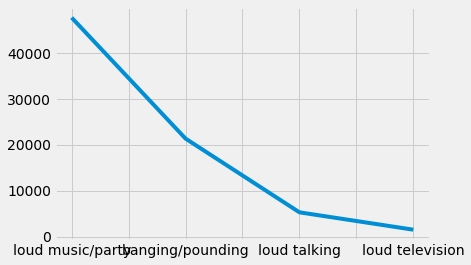

In [51]:
noise_residential_df.descriptor.value_counts().plot()

In [52]:
# noise_df = df[df.complaint_type == 'noise'].copy()
# noise_df.head(5)

In [53]:
# Why did you pick these columns to calculate the answer?

In [54]:
# NYPD    NYPD    noise - residential           75828
# DEP     DEP     noise                         31234

In [55]:
# I chose the complaint-type of "noise-residential" because it specified 
# the location as opposed to purely noise, which when in a quick look
# at the data sorted by noise tended to be complaints focused on 
# construction such as jack hammering which was unclear whether the 
# complaints were residential related

In [56]:
# residential_df = df[df.location_type == 'residential building'].copy()
# residential_df.head(3)

In [57]:
# residential_df.complaint_type.value_counts()

In [58]:
# residential_df[residential_df.complaint_type.str.contains("noise")] 

## What time of day do "Loud Music/Party" complaints come in? Make it a chart!

In [59]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [60]:
loud_music_party_df = df[df.descriptor == 'loud music/party'].copy()
# loud_music_party_df.head(3)

In [61]:
loud_music_party_df.created_date.dt.hour.value_counts()

23    10845
22    10575
0      9552
21     7485
1      6369
20     5618
19     4110
2      3669
18     3039
17     2480
3      2319
16     2256
15     1861
14     1529
13     1441
4      1387
12     1228
11      983
5       808
10      761
9       660
8       510
6       491
7       485
Name: created_date, dtype: int64

<AxesSubplot:xlabel='hour in the day (24-hr clock)', ylabel='# of complaints'>

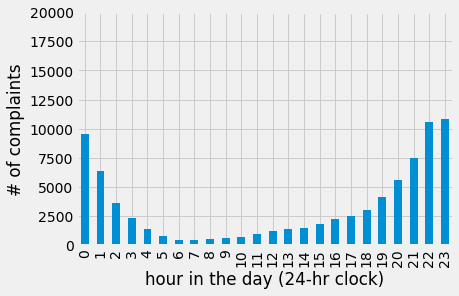

In [62]:
loud_music_party_df.created_date.dt.hour.value_counts().sort_index().plot(kind = 'bar', ylim=(0,20000), xlabel='hour in the day (24-hr clock)', ylabel='# of complaints')

In [63]:
# do we want a super-12am or do we want separate lonely 12ams
# when your plot looks crazy, if it's just a .plot()
# you probably need .sort_index() beforehand
# (but look at your data to confirm!!!!)
# df[df.descriptor == 'Loud Music/Party'] \
#     .created_date.dt.hour.value_counts() \
#     .sort_index().plot()

## When do people party hard?

Make a monthly chart of Loud Music/Party complaints since the beginning of the dataset. Make it count them on a biweekly basis (every two weeks).

In [64]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [65]:
# make bi-weekly chart

In [66]:
# biweekly / 2 weekly
# homicides_df.resample('2W', on='incident_datetime').size().plot()

In [67]:
loud_music_party_df.resample('2W', on='created_date').size().sort_values(ascending=False).head(5)

created_date
2019-05-26    15039
2019-06-09    14733
2019-05-12    10200
2019-04-14     9662
2019-04-28     8626
dtype: int64

<AxesSubplot:xlabel='created_date'>

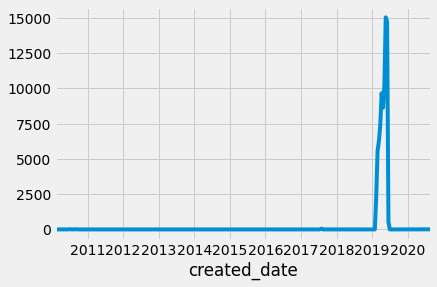

In [68]:
loud_music_party_df.resample('2W', on='created_date').size().plot()

In [69]:
# df[df.descriptor == 'Loud Music/Party'] \
#     .resample('2W', on='created_date').size() \
#     .plot()

## People and their bees

Sometimes people complain about bees! Why they'd do that, I have no idea. It's somewhere in "complaint_type" – can you find all of the bee-related complaints?

In [70]:
df[df.complaint_type.str.contains("bee")]

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,zip,incident_address,address_type,city,status,borough,channel
288065,42054326,2019-03-26 19:10:34,2019-04-05 15:00:55,DOHMH,department of health and mental hygiene,harboring bees/wasps,beekeeping - honeybees,1-2 family dwelling,11103.0,24-19 42 STREET,address,astoria,closed,queens,phone
291446,42058804,2019-03-26 18:14:03,2019-04-05 15:02:00,DOHMH,department of health and mental hygiene,harboring bees/wasps,beekeeping - honeybees,1-2 family dwelling,11104.0,42-19 42 STREET,address,sunnyside,closed,queens,phone
372834,42163934,2019-04-08 18:26:04,2019-04-29 11:18:17,DOHMH,department of health and mental hygiene,harboring bees/wasps,bees/wasps - not a beekeper,1-2 family dwelling,10302,57 HOOKER PLACE,address,staten island,closed,staten island,phone
378505,42171504,2019-04-08 15:50:40,2019-04-29 11:11:42,DOHMH,department of health and mental hygiene,harboring bees/wasps,bees/wasps - not a beekeper,1-2 family mixed use building,11214,2060 78 STREET,address,brooklyn,closed,brooklyn,online
391645,42189666,2019-04-10 19:28:14,2019-04-29 11:17:09,DOHMH,department of health and mental hygiene,harboring bees/wasps,beekeeping - honeybees,1-2 family dwelling,10469,1462 STICKNEY PLACE,address,bronx,closed,bronx,phone
466469,42291921,2019-04-23 11:39:59,2019-05-06 09:36:28,DOHMH,department of health and mental hygiene,harboring bees/wasps,bees/wasps - not a beekeper,1-2 family dwelling,11210,674 EAST 22 STREET,address,brooklyn,closed,brooklyn,phone
472431,42300656,2019-04-23 14:56:21,2019-05-06 09:37:30,DOHMH,department of health and mental hygiene,harboring bees/wasps,bees/wasps - not a beekeper,3+ family apartment building,10037,2311 5 AVENUE,address,new york,closed,manhattan,phone
506112,42497797,2019-04-28 15:33:33,2019-05-13 11:10:45,DOHMH,department of health and mental hygiene,harboring bees/wasps,beekeeping - honeybees,1-2 family dwelling,11385,2017 HARMAN STREET,address,ridgewood,closed,queens,online
532844,42533095,2019-05-02 13:13:47,2019-05-13 11:10:47,DOHMH,department of health and mental hygiene,harboring bees/wasps,bees/wasps - not a beekeper,1-2 family dwelling,11419,107-14 125 STREET,address,south richmond hill,closed,queens,online
547427,42549720,2019-05-02 12:45:50,2019-05-13 11:10:46,DOHMH,department of health and mental hygiene,harboring bees/wasps,beekeeping - honeybees,1-2 family dwelling,10309,62 SHARROTTS ROAD,address,staten island,closed,staten island,phone


### What month do most of the complaints happen in? I'd like to see a graph.

In [71]:
bees_df = df[df.complaint_type.str.contains("bee")]
bees.shape

NameError: name 'bees' is not defined

In [ ]:
bees_df.created_date.dt.month.value_counts().sort_index().plot(kind = 'bar', xlabel='month', ylabel='# of complaints')

In [ ]:
# bees_df.resample('W', on='created_date').size().plot()

### Are the people getting in trouble usually beekeepers or not beekeepers?

In [ ]:
bees_df.descriptor.value_counts()

# Math with datetimes

## How long does it normally take to resolve a 311 complaint?

Even if we didn't cover this in class, I have faith that you can guess how to calculate it.

In [ ]:
# df.shape

In [ ]:
df = df.dropna(subset=['closed_date'])
df = df.dropna(subset=['created_date'])

In [ ]:
# df.created_date.shape

In [ ]:
# df.head(10)
# (df.closed_date - df.created_date).value_counts()

In [ ]:
# (df.closed_date - df.created_date).value_counts()

In [ ]:
(df.closed_date - df.created_date).median()

In [ ]:
(df.closed_date - df.created_date).describe()

Save it as a new column called `time_to_fix`

In [77]:
df['time_to_fix'] = df.closed_date - df.created_date
df.time_to_fix.head(3)

0   16 days 15:27:04
1   14 days 15:00:26
2   29 days 21:26:32
Name: time_to_fix, dtype: timedelta64[ns]

## Which agency has the best time-to-fix time?

In [ ]:
df.groupby('agency')['time_to_fix'].median().groupby(level=0).nlargest(1).sort_values(ascending = True)

## Maybe we need some more information...

I might want to know how big our sample size is for each of those, maybe the high performers only have one or two instances of having requests filed!

### First, try using `.describe()` on the time to fix column after your `groupby`.

In [78]:
df.groupby('agency')['time_to_fix'].describe().head(3)

,count,mean,std,min,25%,50%,75%,max
agency,,,,,,,,
DCA,4240,8 days 08:31:23.992924528,14 days 09:41:39.598342510,0 days 00:24:01,1 days 03:38:28.500000,3 days 14:12:31,15 days 10:31:43.250000,537 days 20:01:13
DEP,117430,5 days 19:02:18.407732266,34 days 05:31:03.045499935,-2 days +17:52:00,0 days 02:48:00,0 days 22:04:00,3 days 06:57:45,3066 days 15:20:00
DFTA,2286,11 days 06:59:23.784776902,4 days 07:14:40.474996499,0 days 00:42:48,9 days 00:14:03.750000,12 days 05:36:54.500000,14 days 00:29:02.750000,33 days 17:46:05


In [72]:
# df.groupby('agency').time_to_fix.median().sort_values()

### Now, an alternative

Seems a little busy, yeah? **You can also do smaller, custom aggregations.**

Try something like this:

```python
# Multiple aggregations of one column
df.groupby('agency').time_to_fix.agg(['median', 'size'])

# You can also do something like this to reach multiple columns
df.groupby('agency').agg({
    'time_to_fix': ['median', 'size']
})
```

In [79]:
df.groupby('agency').time_to_fix.agg(['median', 'size'])

,median,size
agency,,
DCA,3 days 14:12:31,4240
DEP,0 days 22:04:00,117430
DFTA,12 days 05:36:54.500000,2286
DHS,0 days 01:13:03,482
DOB,10 days 07:07:19.500000,209122
DOE,4 days 04:19:03,354
DOF,10 days 20:55:21,2408
DOHMH,3 days 10:33:08,10509
DOITT,14 days 17:30:55,153


In [80]:
df.groupby('agency').agg({
    'time_to_fix': ['median', 'size']
})

time_to_fix        
                        median    size
agency                                
DCA            3 days 14:12:31    4240
DEP            0 days 22:04:00  117430
DFTA   12 days 05:36:54.500000    2286
DHS            0 days 01:13:03     482
DOB    10 days 07:07:19.500000  209122
DOE            4 days 04:19:03     354
DOF           10 days 20:55:21    2408
DOHMH          3 days 10:33:08   10509
DOITT         14 days 17:30:55     153
DOT            0 days 17:24:23  283114
DPR     2 days 20:34:59.500000   13454
DSNY           2 days 00:52:00  268788
EDC           19 days 00:41:53     148
HPD            6 days 00:00:00  813710
NYPD           0 days 02:32:47  261794
TLC           44 days 12:56:56    3103

## Seems weird that NYPD time-to-close is so fast. Can we break that down by complaint type?

Remember the order: 

1. Filter
2. Group
3. Grab a column
4. Do something with it
5. Sort

In [81]:
# df[df.month == 'May'].groupby('products').sales.sum().sort_values()
# df.groupby('agency').time_to_fix.agg(['median', 'size'])

# .groupby('products').sales.sum().sort_values()
# df.groupby('agency').time_to_fix.agg(['median', 'size'])

df[df.agency == 'NYPD'].groupby('complaint_type').time_to_fix.agg(['median', 'size']).sort_values('median', ascending = True)

,median,size
complaint_type,,
illegal fireworks,0 days 01:24:45.500000,32
noise - vehicle,0 days 01:38:57,14933
traffic,0 days 01:50:53,1473
noise - house of worship,0 days 01:55:22,288
traffic/illegal parking,0 days 01:55:49,19
bike/roller/skate chronic,0 days 01:58:29,166
noise - park,0 days 02:00:15,1354
noise - commercial,0 days 02:00:57,15097
noise - street/sidewalk,0 days 02:04:00,26830


In [82]:
# STEP ONE: Filter for the NYPD
# STEP TWO: Put in the groups based on complaint_type
# STEP THREE: Get the column we're interested in - time_to_fix
# STEP FOUR: calculate our median
# STEP FIVE: sort it so we know which ones are fast vs which are slow
df[df.agency == 'NYPD'].groupby('complaint_type') \
    .time_to_fix.median().sort_values()

complaint_type
illegal fireworks             0 days 01:24:45.500000
noise - vehicle                      0 days 01:38:57
traffic                              0 days 01:50:53
noise - house of worship             0 days 01:55:22
traffic/illegal parking              0 days 01:55:49
bike/roller/skate chronic            0 days 01:58:29
noise - park                         0 days 02:00:15
noise - commercial                   0 days 02:00:57
noise - street/sidewalk              0 days 02:04:00
non-emergency police matter          0 days 02:22:21
drinking                      0 days 02:22:53.500000
urinating in public                  0 days 02:23:07
noise - residential                  0 days 02:27:07
vending                       0 days 02:29:35.500000
panhandling                          0 days 02:30:34
disorderly youth                     0 days 02:34:04
homeless encampment                  0 days 02:43:34
illegal parking                      0 days 02:45:36
graffiti                       

## Back to median fix time for all agencies: do these values change based on the borough?

First, use `groupby` to get the median time to fix per agency in each borough. You can use something like `pd.set_option("display.max_rows", 200)` if you can't see all of the results by default!

In [83]:
pd.set_option("display.max_rows", 200)

In [ ]:
# df.groupby('agency').time_to_fix.agg(['median', 'size']).sort_values(by = 'borough', ascending = False)

In [ ]:
# df.groupby('agency')['borough'].time_to_fix.agg(['median', 'size']).sort_values()

In [ ]:
# df.groupby('agency').borough.time_to_fix.agg(['median', 'size'])
# df.groupby('agency').time_to_fix.agg(['median', 'size'])
# df.groupby('agency')['time_to_fix'].describe().head(3)

In [ ]:
# df.agency.groupby('borough').time_to_fix.agg(['median', 'size']).sort_values('median', ascending = True)

In [ ]:
# borough_df = df.borough

In [85]:
# df[df.agency == 'NYPD'].groupby('complaint_type').time_to_fix.median().sort_values()
df.groupby(['agency', 'borough']).time_to_fix.median().sort_values() \
    .to_frame('median_time_to_fix').reset_index()

,agency,borough,median_time_to_fix
0,DHS,queens,0 days 00:50:56
1,DHS,manhattan,0 days 01:08:42
2,DHS,bronx,0 days 01:22:23
3,DHS,brooklyn,0 days 01:39:03
4,NYPD,manhattan,0 days 01:53:18
5,DOT,bronx,0 days 02:24:28
6,NYPD,queens,0 days 02:32:24.500000
7,NYPD,brooklyn,0 days 02:33:14
8,NYPD,staten island,0 days 02:34:59
9,NYPD,unspecified,0 days 03:26:32


### Or, use another technique!

We talked about pivot table for a hot second in class, but it's (potentially) a good fit for this situation:

```python
df.pivot_table(
    columns='what will show up as your columns',
    index='what will show up as your rows',
    values='the column that will show up in each cell',
    aggfunc='the calculation(s) you want dont'
)
```

In [86]:
df.pivot_table(
    columns='borough',
    index='agency',
    values='time_to_fix',
#     aggfunc='median'
)

borough,bronx,brooklyn,manhattan,queens,staten island,unspecified
agency,,,,,,
DCA,8 days 08:13:18.065079365,8 days 13:41:39.597602739,7 days 19:28:34.772432932,8 days 05:31:42.055013309,7 days 18:52:27.918918918,14 days 23:14:18.627906976
DEP,8 days 00:41:49.807661225,5 days 09:52:19.436139679,4 days 01:39:11.820563614,7 days 16:47:18.118764845,3 days 08:53:46.819536803,7 days 06:19:13.846153846
DFTA,11 days 21:02:51.703777336,11 days 09:00:15.396965866,11 days 01:44:25.484507042,11 days 05:18:46.223157894,12 days 00:02:59.537037037,8 days 14:51:56.370370370
DHS,0 days 02:43:37.440000,0 days 03:51:41.758064516,0 days 02:52:35.356164383,0 days 02:22:07.948717948,0 days 04:15:57.500000,NaT
DOB,67 days 06:09:09.180496269,60 days 06:04:39.410007268,48 days 00:51:20.364283687,68 days 23:11:44.787518549,43 days 23:23:44.990160927,NaT
DOE,38 days 09:25:28.204819277,4 days 03:35:15.204819277,25 days 10:07:12.884057971,14 days 14:26:18.518072289,38 days 12:21:31.793103448,9 days 18:37:03.142857142
DOF,16 days 05:48:10.750000,15 days 17:24:13.029154519,13 days 11:43:39.629310344,15 days 02:14:41.413314840,15 days 12:23:47.658227848,NaT
DOHMH,7 days 15:31:28.714017521,10 days 10:07:26.877419354,0 days 03:40:40.242641780,12 days 19:15:01.775586854,12 days 03:13:48.734835355,28 days 03:49:13.750000
DOITT,13 days 21:17:32.100000,13 days 05:59:27.914285714,15 days 15:21:44.244186046,18 days 01:37:04.095238095,17 days 21:47:06,NaT


### Use the pivot table result to find the worst-performing agency in the Bronx, then compare with Staten Island

Since it's a dataframe, you can use the power of `.sort_values` (twice!). Do any of the agencies have a large difference between the two?

In [87]:
df.pivot_table(
    columns='borough',
    index='agency',
    values='time_to_fix',
#     aggfunc='median'
).sort_values(by = 'bronx', ascending = False).head(1)

borough,bronx,brooklyn,manhattan,queens,staten island,unspecified
agency,,,,,,
DOB,67 days 06:09:09.180496269,60 days 06:04:39.410007268,48 days 00:51:20.364283687,68 days 23:11:44.787518549,43 days 23:23:44.990160927,NaT


## What were the top ten 311 types of complaints on Thanksgiving 2020? Are they different than the day before Thanksgiving?

**Finding exact dates is awful, honestly.** While you can do something like this to ask for rows after a specific date:

```python
df[df.date_column >= '2020-01-01']
```

You, for some reason, can't ask for an **exact match** unless you're really looking for exactly at midnight. For example, this won't give you what you want:

```python
df[df.date_column == '2020-01-01']
```

Instead, the thing you need to do is this:

```python
df[(df.date_column >= '2020-01-01') & (df.date_column < '2020-01-02']
```

Everything that starts at midnight on the 1st but *is still less than midnight on the 2nd**.

In [88]:
# 
#  
df[(df.created_date >= '2020-11-26') & (df.created_date < '2020-11-27')] \
    .complaint_type.value_counts()


Series([], Name: complaint_type, dtype: int64)

In [ ]:
# df[(df.date_column >= '2020-01-01') & (df.date_column < '2020-01-02']

# df[(df.created_date >= '2020-11-26') & (df.created_date < '2020-11-27')]
# .groupby('complaint_type').value_counts()

# df.created_date.plot(y = 'created_date')

In [ ]:
# df.pivot_table(
#     columns='complaint_type',
#     index='agency',
#     values='time_to_fix',
# #     aggfunc='median'
# ).sort_values(by = 'bronx', ascending = False).head(1)

In [ ]:
df.head(2)

## What is the most common 311 complaint types on Christmas day?

And I mean *all Christmas days*, not just in certain years)

* Tip: `dt.` and `&` are going to be your friend here
* Tip: If you want to get fancy you can look up `strftime`
* Tip: One of those is much much faster than the other

# Stories

Let's approach this from the idea of **having stories and wanting to investigate them.** Fun facts:

* Not all of these are reasonably answered with what our data is
* We only have certain skills about how to analyzing the data
* There are about six hundred approaches for each question

But: **for most of these prompts there are at least a few ways you can get something interesting out of the dataset.**

## Fireworks and BLM

You're writing a story about the anecdotal idea that the summer of the BLM protests there were an incredible number of fireworks being set off. Does the data support this?

What assumptions is your analysis making? What could make your analysis fall apart?

In [ ]:
# summer 2020 

In [91]:

#case=False makes it not case sensitive 
df[df.complaint_type.str.contains("firework", case=False)] \
    .resample('M', on='created_date').size()

created_date
2019-03-31     3
2019-04-30     3
2019-05-31    15
2019-06-30    11
Freq: M, dtype: int64

<AxesSubplot:xlabel='created_date'>

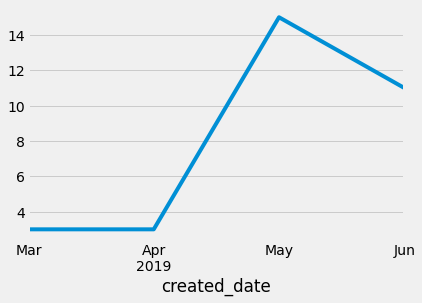

In [92]:
df[df.complaint_type.str.contains("firework", case=False)] \
    .resample('M', on='created_date').size().plot()

## Sanitation and work slowdowns

The Dept of Sanitation recently had a work slowdown to protest the vaccine mandate. You'd like to write about past work slowdowns that have caused garbage to pile up in the street, streets to not be swept, etc, and compare them to the current slowdown. You've also heard rumors that it was worse in Staten Island and a few Brooklyn neighborhoods - Marine Park and Canarsie - than everywhere else.

Use the data to find timeframes worth researching, and note how this slowdown might compare. Also, is there anything behind the geographic issue?

What assumptions is your analysis making? What could make your analysis fall apart?

In [93]:
df[df.agency == 'DSNY'].complaint_type.value_counts().head(10)

request large bulky item collection    77930
dirty conditions                       52613
missed collection (all materials)      48064
sanitation condition                   37122
electronics waste appointment          14245
derelict vehicles                      10257
snow                                   10155
other enforcement                       6796
litter basket / request                 2853
derelict bicycle                        2034
Name: complaint_type, dtype: int64

In [97]:
# df[df.complaint_type == 'missed collection (all materials)'].resample('W', on='created_date').size().plot()

<AxesSubplot:xlabel='created_date'>

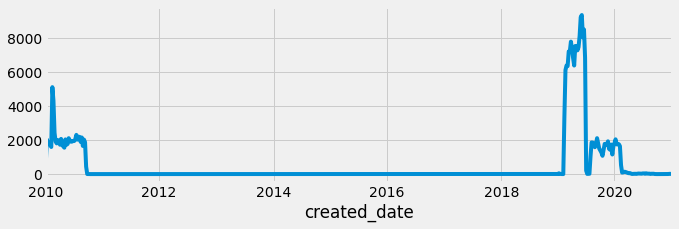

In [96]:
df[df.agency == 'DSNY'] \
    .resample('W', on='created_date') \
    .size().plot(figsize=(10, 3))

## Gentrification and whining to the government

It's said that when a neighborhood gentrifies, the people who move in are quick to report things to authorities that would previously have been ignored or dealt with on a personal basis. Use the data to investigate the concept (two techniques for finding gentrifying area are using census data and using Google).

What assumptions is your analysis making? What could make your analysis fall apart? Be sure to cite your sources. 

In [ ]:
# plot of supposedly gentrifying zip codes

## 311 quirks

Our editor tried to submit a 311 request using the app the other day, but it didn't go through. As we all know, news is what happens to your editor! Has the 311 mobile app ever actually stopped working?

If that's a dead end, maybe you can talk about the differences between the different submission avenues: could a mobile outage disproportionately impact a certain kind of complaint or agency? How about if the phone lines stopped working?

What assumptions is your analysis making? What could make your analysis fall apart?

## NYCHA and public funds

NYC's public housing infrastructure is failing, and one reason is lack of federal funds. While the recent spending bills passed through Congress might be able to help, the feeling is that things have really fallen apart in the past however-many years – as time goes on it gets more and more difficult for the agency in control of things to address issues in a timely manner.

If you were tasked with finding information to help a reporter writing on this topic, you will **not** reasonably be able to find much in the dataset to support or refute this. Why not? 

If you wanted to squeeze something out of this dataset anyway, what could an option be? (You might need to bring in another dataset.)